# Predicting Office Episode Popularity

BY CLAIRE COLLVER, DREW HAGER, and LINA McDERMOTT

### “Sometimes I’ll start a sentence and I don’t even know where it’s going. I just hope I find it along the way.” – Michael Scott

##### Intro & Problem

The Office is one of America’s favorite television series (well, it's at least #1 on Netflix). Known for its memorable characters and humorous dialog, it presented itself as the perfect opportunity to practice building some machine learning models. We found a dataset containing every line of dialogue ever spoken in The Office, and from there we decided to try to build a model to predict the IMDB user rating of each episode.

##### Data Explanation and Exploration

The data was originally stored in a 59,910 x 7 array where the rows represented each line of dialogue and the columns were the following features: id, season, episode, scene, line of text, speaker, and if the line was from a deleted scene. We ended up removing the column for the scene and the column for deleted, as well as the lines from deleted scenes.

In [5]:
import pandas as pd

data = pd.read_csv("data/the-office-lines-scripts.csv")
data = data[data.deleted == False]
data = data.drop(['id', 'deleted', 'scene'], axis = 1)
print(data.head(n=5))

   season  episode                                          line_text  speaker
0       1        1  All right Jim. Your quarterlies look very good...  Michael
1       1        1         Oh, I told you. I couldn't close it. So...      Jim
2       1        1  So you've come to the master for guidance? Is ...  Michael
3       1        1         Actually, you called me in here, but yeah.      Jim
4       1        1    All right. Well, let me show you how it's done.  Michael


59,910 rows of data is a lot to work with, especially when there are only 6 features post feature selection, and one of those features is just a string of text. This meant that we had to think about and represent the data for our models in different ways. We began by removing common words from the dialogue using a commons words dictionary we found online. Examples of these words include “the,” “and,” “with,” and “if.” We also added conversational words to this dictionary that appeared often, such as “yeah,” “hey,” and “uh.” Common words appear frequently in the dialogue, but do not contribute to the overall dialogue itself, so they are not relevant. 

The first idea we had for restructuring the data was to make a feature for each word spoken in the show, with the number of times a word was spoken in a given episode as the value. This was cool, but created over 25,000 features, which isn’t exactly superb when you’re only working with 188 examples! Given that this first data representation was so large, we decided to create two more data representations that focused more on the speaker of each line, rather than the words themselves. We produced the following two data representations: a dataset in which each character was a feature and the values were the number of words each character spoke in an episode, and a dataset in which each character was a feature and the values were the number of lines each character spoke in an episode.

In [10]:
data1 = pd.read_csv("data/clean_data.csv")
print("DATA REPRESENTATION 1: \n", data1.iloc[0:5, 1:8])
data2 = pd.read_csv("data/character_words.csv")
print("DATA REPRESENTATION 2: \n", data2.iloc[0:5, 1:8])
data3 = pd.read_csv("data/character_lines.csv")
print("DATA REPRESENTATION 3: \n", data3.iloc[0:5, 1:8])

DATA REPRESENTATION 1: 
    _cumulative_episode  _episode  _season  right   jim  quarterlies  things
0                  0.0       1.0      1.0   18.0   6.0          1.0     3.0
1                  1.0       2.0      1.0   22.0   7.0          0.0     1.0
2                  2.0       3.0      1.0   13.0  17.0          0.0     1.0
3                  3.0       4.0      1.0   16.0  13.0          0.0     0.0
4                  4.0       5.0      1.0   26.0  18.0          0.0     1.0
DATA REPRESENTATION 2: 
    _cumulative_episode  _episode  _season  Michael   Jim   Pam  Dwight
0                  0.0       1.0      1.0     81.0  36.0  41.0    29.0
1                  1.0       2.0      1.0     81.0  27.0  16.0    19.0
2                  2.0       3.0      1.0     56.0  42.0  32.0    62.0
3                  3.0       4.0      1.0     79.0  49.0  22.0    58.0
4                  4.0       5.0      1.0    106.0  22.0  14.0    26.0
DATA REPRESENTATION 3: 
    _cumulative_episode  _episode  _season  

With a data point for each episode in each of these data representations, we then located and encoded our targets -- the IMDB ratings for each episode. Given the success of The Office, it should not come as a surprise that the average IMDB rating for The Office is a whopping 8.26 with some episodes scoring up to a 9.8!

In [17]:
import numpy as np
targets = np.load("data/IMDB_scores.npy")
print("TARGETS: \n", targets)
print("\n MEAN TARGET: ", targets.mean())

TARGETS: 
 [7.5 8.3 7.9 8.1 8.4 7.8 8.8 8.2 8.4 8.4 8.2 8.2 8.6 8.2 8.4 8.9 8.6 9.1
 8.3 7.9 8.2 8.3 8.5 8.3 8.1 8.4 8.7 9.4 9.  8.2 8.6 8.  8.2 8.  8.6 8.8
 8.3 8.8 8.5 8.7 8.8 8.2 8.2 8.9 8.5 9.  8.8 8.8 8.8 9.2 9.4 8.8 8.3 8.5
 8.7 8.8 8.5 8.2 8.7 9.4 8.1 8.7 8.4 7.9 9.3 8.8 8.3 8.  8.1 8.1 8.5 8.2
 8.6 8.8 8.4 8.7 8.  9.7 8.2 8.2 8.  8.7 8.3 8.4 8.3 8.7 8.7 9.2 8.2 8.7
 9.  8.8 8.1 8.  9.4 9.4 7.6 8.6 8.2 8.1 8.6 8.2 8.3 8.5 6.8 7.7 8.1 8.4
 8.5 7.7 7.8 8.6 7.9 8.  8.2 7.8 8.  8.4 8.3 8.2 7.9 7.8 8.2 7.4 7.9 7.7
 8.2 9.  8.3 7.7 8.5 8.4 9.4 7.5 9.3 7.8 9.  9.8 7.7 8.7 8.8 8.2 8.1 7.3
 8.1 7.6 7.7 7.7 6.9 7.7 8.  7.9 8.  7.5 7.7 7.8 8.1 7.8 7.8 6.7 7.1 7.1
 7.1 7.7 7.7 7.7 7.2 7.4 7.8 7.  7.7 7.6 7.8 8.3 7.6 7.9 8.  7.6 7.5 7.4
 8.2 7.5 8.  8.  8.  9.  9.5 9.8]

 MEAN TARGET:  8.257978723404255


One of the issues with a dataset like this, however, is the lack of training examples. There are only 188 episodes in total, so that means once we removed test and validation examples, we were only working with about 150 episodes to train on. For our dataset with over 25,000 features, this meant we had to do some serious feature selection. We used a Variance Threshold algorithm, eliminating all features whose variance was under a given amount. By playing with this amount, we were able to remove ~23,000 features. This still might not be optimal, but it’s a step in the right direction! For our character-focused datasets, further feature selection wasn’t as important, as we had already done some pretty serious feature engineering.

Lastly, as a bonus data representation (but mostly out of curiosity), we made copies of the character words/lines datasets and added two additional features: a count for the number of “that’s what she said” jokes made in each episode, and whether or not each episode is a season premiere or finale (which audiences tend to like a little more). Because, hey, why not? Now with our five data representations, we pushed ahead.


<img src="images/shots.jpg" alt="Image not found." style="width: 600px;"/>

#####  Linear Regression

Now, on to the fun stuff! The models! As budding young machine learning computer scientists, we were too excited and jumped straight to neural networks. We then realized it would maybe be smart to start simple, and work our way towards the more complex neural network.

<img src="images/dwight.jpg" alt="Image not found." style="width: 600px;"/>

So we stepped back and went back to the basics - linear regression! What is linear regression? Basically it’s an algorithm that tries to fit a linear function to our data by training on a subset of the data. Instead of writing this algorithm ourselves, we used a scikit learn package to save time and get more efficient results. We tried three different forms of linear regression: plain ol’ linear regression with gradient descent, regression with lasso penalization (L1), and regression with ridge penalty (L2). The L1 norm is associated with lasso and includes built-in feature selection while the L2 norm, associated with ridge, increases computational efficiency. We also changed the hyperparameters, mainly the learning rate (alpha), in order to fine tune our model. Finally, we used the mean absolute error (MAE) to analyze the model’s results. Mean absolute error indicates how far off our models predicted values were from the correct values using raw scores. So, a MAE of 1.0 would indicate that on average, our model guessed the wrong IMDB rating by 1 point. 

While the training MAE indicates how well the model was able to train, it’s important to focus on the MAE of the test set because this score informs us of how the model generalizs to new data and helps indicate potential overfitting, which we want to avoid. We then ran 35 models with different combinations of hyperparameters and regularization on the five different datasets we created, the one with all of the words, the one where we focus on the number of words each character speaks per episode, and the one where we focus on the number of lines each character speaks per episode.

###### Results:

We found that the model using the data broken down to represent only the number of lines per character per episode (with no “that’s what she said" feature, unfortunately) and using lasso regression with the L1 norm produced the best mean absolute error. The best alpha value we found with this model was 0.003. This model gave us a training MAE of 0.1153 and a validation MAE of 0.1345. 

<img src="figs/bestLR.png" alt="Image not found." style="width: 800;"/>

racter_lines-True-0.003
Training MAE: 0.1153
Test MAE: 0.1345


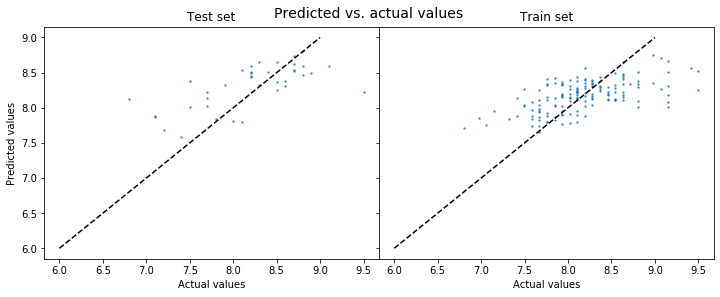

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


def linear_regression(filename, lasso, a):
    x_train = np.load(filename + '_x_train.npy')
    x_test = np.load(filename + '_x_test.npy')
    y_train = np.load(filename + '_y_train.npy')
    y_test = np.load(filename + '_y_test.npy')
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    y_train = scaler.fit_transform(y_train)
    y_test = scaler.fit_transform(y_test)
    # Create linear regression object
    if lasso:
        regr = linear_model.Lasso(alpha=a)
    else:
        regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    # Make predictions using the testing set
    y_test_pred = regr.predict(x_test)
    y_train_pred = regr.predict(x_train)
    # The coefficients
    print (filename[8:] + "-" + str(lasso) + "-" + str(a))
    # The mean squared error
    print("Training MAE:", round(mean_absolute_error(y_train, y_train_pred),4))
    print("Test MAE:", round(mean_absolute_error(y_test, y_test_pred),4))
    y_test_pred = y_test_pred.reshape(-1, 1)
    y_test_pred_unscaled = scaler.inverse_transform(y_test_pred)
    y_train_pred = y_train_pred.reshape(-1, 1)
    y_train_pred_unscaled = scaler.inverse_transform(y_train_pred)
    y_train = y_train.reshape(-1,1)
    y_train_unscaled = scaler.inverse_transform(y_train)
    y_test = y_test.reshape(-1,1)
    y_test_unscaled = scaler.inverse_transform(y_test)
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    ax1.scatter(y_test_unscaled, y_test_pred_unscaled, s=2, alpha=0.7)
    ax1.plot(list(range(6,10)), list(range(6,10)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    ax2.scatter(y_train_unscaled, y_train_pred_unscaled, s=2, alpha=0.7)
    ax2.plot(list(range(6,10)), list(range(6,10)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    plt.show()
linear_regression('data/character_lines', True, 0.003)

While this is a good model, our preliminary results from the neural network were more promising so we chose to leave the linear model here and spend more time fine-tuning the neural network.

##### Neural Networks

Okay, we exhausted what we could with linear regression. Now, the extra fun stuff!! Neural networks!! What Angela’s cats are to her, these models are to us. Neural networks are super cool because they can find patterns in the data that we might not see. They’re used for a lot of modern day applications, so we were excited to be able to use them for this project. We ran over 200 models, varying the data representation we used, the penalty for L1 regularization,  the step size, and, for the extra-large dataset, the variance threshold. For all of these models, we used early stopping, in which the model will stop itself once its loss stops decreasing. We then restore the best weights of the model, so that we end up with the best possible results for each run. 

One of our largest problems with the neural networks was overfitting: the model would perform extremely well on training data, but then would generalize terribly to new data. L1 regularization helped with this, as did adjusting step size! Below is a model that trained very well but overfit way too much.


<img src="figs/overfit.png" alt="Image not found." style="width: 800;"/>

We thought we might be running into issues because of how few examples we have, so we tried implementing k-fold cross validation to better make use of our entire dataset. Unfortunately, it didn’t really work, and only made our results worse.

We even tried the leave-one-out method in which the whole data set is used as the train set except for one data point which is tested. This process is repeated for every point and the MAE for each of the tests is averaged. With this method we obtained a MAE of 0.358 (way worse than our other models). 

###### Results:

After all of that work, the neural network did not perform that much better than the basic regression model. 

<img src="images/brokenheart.jpg" alt="Image not found." style="width: 600px;"/>

We ended with a training MAE of 0.0962 (which is super low!) but a validation MAE of 0.1374. This model used the character lines data representation, an L1 penalty of 0.001, and a learning rate of 0.0003. 

<img src="figs/bestLR.png" alt="Image not found." style="width: 800;"/>

This is still our lowest validation MAE of all the neural network models, but as you can see, the model isn’t generalizing as well as we’d like. This could be because our data is fairly straightforward, so there aren’t that many hidden connections or relationships that a neural network could find that a basic regression model couldn’t. 

Alternatively this could be due to the fact that our targets, IMDB scores, are fairly subjective scores and are likely a product of many other things besides the script. Let's give the actors/actresses some credit, right? If it were the three of us up there reading this script, the show might not have (definitely would not have) received such high scores. All of this is to say that there are certainly a lot of other factors that influence these scores, and while our model may not be perfect, it does a pretty good job for just using the script!

##### Conclusion & Future Work

In conclusion, we found that both our basic regression model and the neural network performed well with this data. Both models worked the best with the dataset that only focused on the number of lines per character per episode and did not include the that’s what she said column or the finale/premiere column. We think this is because this dataset most accurately represents the amount of screentime for each character, which we believe could be correlated to ratings. The mean absolute error values for both of these models were quite close, so it’s hard to conclude which model is definitively the best. However, we do appreciate the simplicity and interpretability of the linear regression model. 


If we were to do a variation of this project again, we would probably find new ways to represent the data, and we would find more data to include in the dataset. For example, we could try to predict the total number of viewers per episode instead of the IMDB scores. Additionally, we could try principle component analysis, which is a method of feature engineering that emphasizes the variation in a dataset. Of course, that’s all work for another day. For now, we’ll just go back to simply watching The Office and appreciating it in all of its glory.

<img src="images/ending.jpg" alt="Image not found." style="width: 500px;"/>

Image Links:
https://www.lifeandstylemag.com/posts/dwight-quotes-the-office-79285/
https://www.reddit.com/r/DunderMifflin/comments/9u3mcx/my_favorite_part_of_the_final_season/
https://paulalujah.tumblr.com/post/82864209885
https://twitter.com/scranton_quotes/status/509116797576945664